In [2]:
from IPython.display import Image

0.Intro
inner_버스승차인원

지하철과 함께 시민들의 발이 되어 주는 버스.

특히, 제주도같이 지하철을 이용할 수 없는 곳에서는 더더욱 소중하죠.

하지만, 필요할 때 타지 못한다면 결국은 무용지물!

승객들이 버스를 효율적으로 이용할 수 있게 하려면 어떻게 운영해야 할까요?

December, 2022, ver.001 | All rights reserved by Dacon

버스 운행 시간 예측 프로젝트에 참여하신 데이커 여러분, 환영합니다. 🙌
한국처럼 대중교통이 잘 발달한 나라도 세계적으로 드물다고 하죠.
특히나 도서 지방은 지리적 특성상 지하철을 설치하기 어려워 버스 의존도가 내륙에 비하여 더 높은 것이 현실입니다.

다 함께 제주도의 버스 운행 시간을 예측해서 더 쾌적한 제주도를 만들어 볼까요?

물류/운송 프로젝트 초보자도 함께하는 데이콘 프로젝트 교육, go go!

[프로젝트의 목적]

버스 운행 시간, next_arrive_time 을 예측
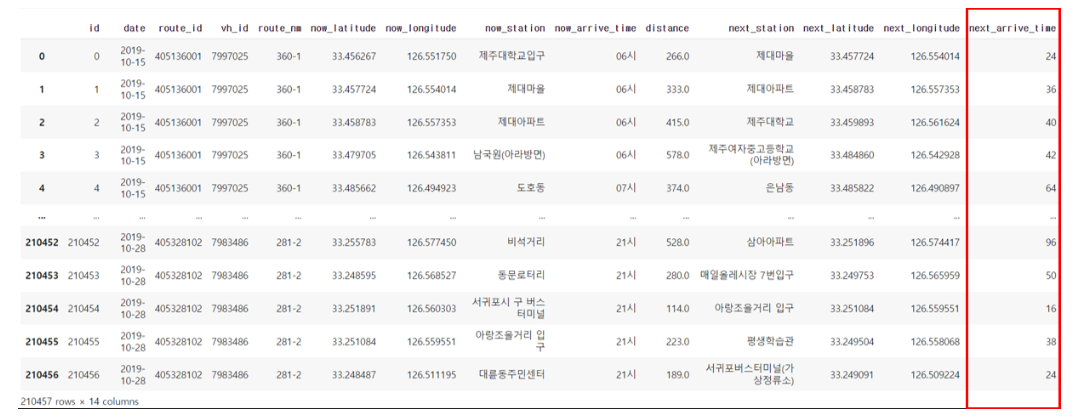

앞서 데이터 불러오기에서 test 데이터에는 train 데이터와 달리
버스 운행 시간, next_arrive_time 열이 없었던 것을 기억하시나요?

또 정답 제출용 파일인 sample_submission에는 next_arrive_time(버스 운행 시간) 데이터가 모두 0으로 채워져 있는 것을 보았습니다.

이를 통해 next_arrive_time(버스 운행 시간)을 예측하는 문제인 것을 확인했었죠!

다시 정리하면, 이번 프로젝트의 목적은 날짜, 운행 정보, 역 정보, 운행 시각 정보를 가지고 버스 운행 시간을 예측하는 것입니다.

1.데이터 불러오기
[문제 1]
지난 시간과 마찬가지로 pandas 라이브러리의 read_csv() 함수를 이용해 분석에 사용할 데이터를 불러와주세요.

In [ ]:
# 데이터를 불러오고 살펴보기 위한 pandas 라이브러리
import pandas as pd
  
# train 데이터 불러오기
train = pd.read_csv('train.csv')

# test 데이터 불러오기
test = pd.read_csv('test.csv')

# sample_submission 데이터 불러오기
submission = pd.read_csv('sample_submission.csv')

2.데이터 확인
이번 스테이지에서는 head()와 info() 메소드를 이용하여 데이터를 살펴보겠습니다.

head() : 상위 5행 데이터 출력
info() : 데이터 결측치 및 변수들의 타입 확인
이번 스테이지에서는 지난 학습에서 다루었던 탐색적 자료 분석(EDA)을 통해 얻은 인사이트를 바탕으로
전처리한 vh_id, now_longitude, now_arrive_time, next_longitude 변수가 있는 데이터 셋을 불러올 것입니다.

그럼 데이터가 어떻게 생겼는지 앞서 언급한 메소드를 이용하여 확인해 봅시다.

In [ ]:
# 데이터 상위 5개 행 출력
train.head()

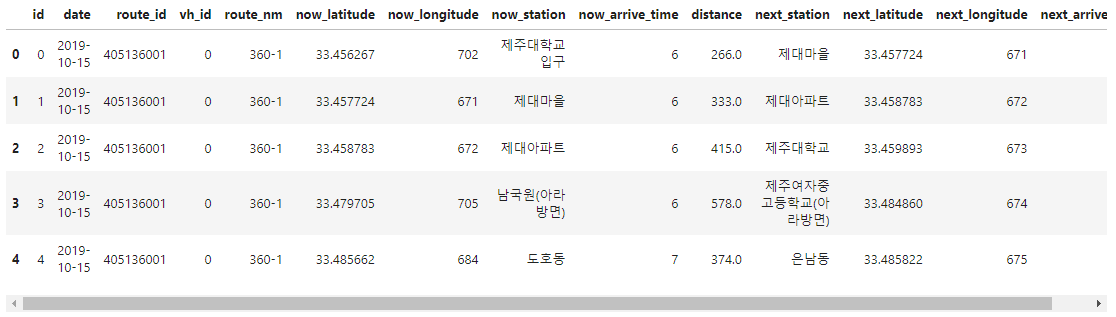

3.데이터프레임 형태 확인
vh_id, now_longitude, now_arrive_time, next_longitude 가 전처리되어 있는 것을 확인해 보았습니다.

그럼 info() 메소드를 이용해 데이터 컬럼, 결측치 및 변수들의 타입을 확인해 봅시다.

In [ ]:
# 데이터 결측치 및 변수들의 타입 확인
train.info()

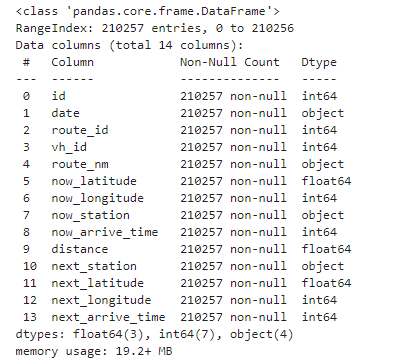

데이터를 살펴보니 총 14개의 열이 있네요. 하나하나 데이터를 살펴볼까요?

id: 해당 데이터에서의 고유한 ID
date: 버스 운행 날짜
route_id: 버스 노선 ID
vh_id: 버스 ID
route_nm: 버스 노선 실제 번호
now_latitude: 현재 정류소의 위도
now_longitude: 현재 정류소의 경도
now_station: 현재 정류소 이름
now_arrive_time: 현재 정류장에 도착한 시간
distance: 현재 정류장에서 다음 정류장까지 실제 이동한 거리
next_station: 다음 정류소 이름
next_latitude: 다음 정류소의 위도
next_longitude: 다음 정류소의 경도
next_arrive_time: 다음 정류장에 도착할 때까지 걸린 시간(단위: 초)으로, 답안 제출을 위해서 예측해야 되는 값
Non-Null Count를 살펴보면 모든 변수에서 결측치(누락된 데이터)는 존재하지 않는 것을 알 수 있습니다.
만약 결측치가 존재한다면, 보다 정확한 모델을 설계하기 위해 적절하게 처리해 주어야 합니다.

또한 train 데이터의 컬럼 정보는 5개의 카테고리로 나눠서 생각할 수 있습니다.

날짜: date
운행 정보: route_id, vh_id, route_nm
역 정보:
현재 역 정보: now_latitude, now_longitude, now_station
다음 역 정보: next_station, next_latitude, next_longitude,
운행 시각: now_arrive_time, distance
예측하고자 하는 대상(운행 시간): next_arrive_time
날짜, 운행 정보, 역 정보, 운행 시각, 운행 시간

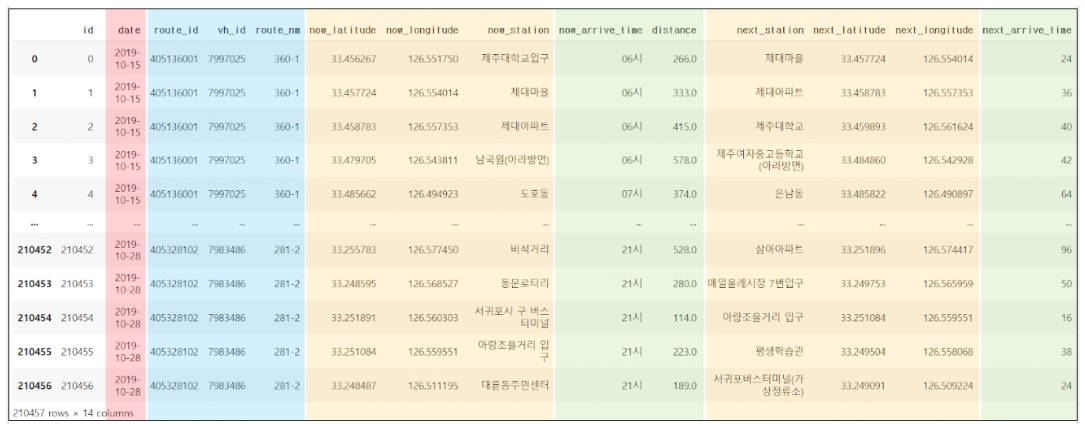

4.test 데이터 상위 5개 확인
그럼 test 셋도 마찬가지로 전처리한 vh_id, now_longitude, now_arrive_time, next_longitude 변수가 있는 데이터 셋인지 확인해봅시다.

In [ ]:
test.head()

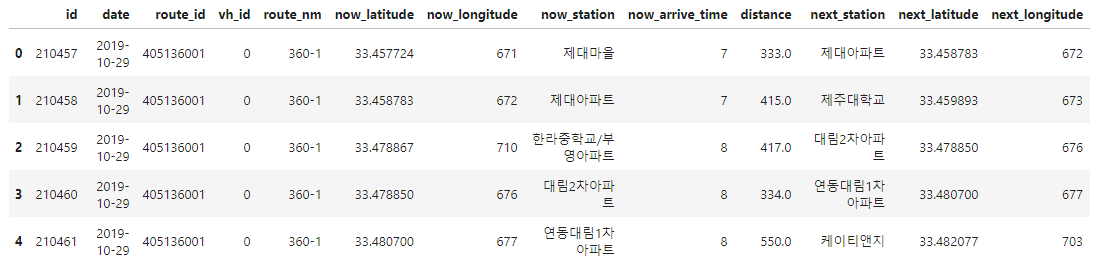

5.종속변수 설정
모델링을 하기 앞서, 독립변수 X와 종속변수(타깃변수) y를 설정해 볼까요?

해당 프로젝트의 목표는 버스 운행 시간의 예측값을 맞히는 것이기 때문에 예측할 변수 Target은 next_arrive_time 입니다.

그럼 모델링을 하기 위하여 train 데이터에서 학습에 사용할 변수 X와 예측할 변수 y를 분리해 보겠습니다.

In [ ]:
# 예측할 변수 y 할당
y = train['next_arrive_time']

# y 데이터를 다시 살펴봅니다.
y.head()

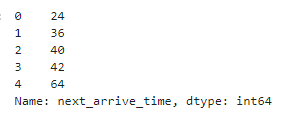

6.독립변수 설정
[문제2]
이제 종속변수를 제외한 독립변수를 설정해 봅시다.
이번엔 직접 해 볼까요?

In [ ]:
# 'vh_id', 'now_longitude', 'now_arrive_time', 'distance', 'next_longitude' 만 사용
features = ['vh_id', 'now_longitude', 'now_arrive_time', 'distance', 'next_longitude']

# 학습에 사용할 변수 X 할당
X = train[features]   

# X 데이터를 다시 살펴봅니다.
X.head()

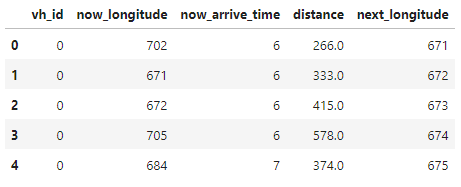

우리가 모델을 학습시킬 때 쓸 독립변수는 vh_id, now_longitude, now_arrive_time, distance, next_longitude 로 총 5개의 독립변수를 이용할 것입니다.

또한 모델링 단계에 앞서, 내가 만들 모델이 유의미한지도 알아야 좋은 결론을 도출할 수 있겠죠?

자 그럼, 앞선 스테이지와 마찬가지로 train 셋과 vaildation 셋을 분리시켜 볼까요?

sklearn의 model_selection 패키지 안에 train_test_split 모듈을 활용하면 손쉽게 train set(학습 데이터 셋)과 test set(테스트 셋)을 분리할 수 있습니다.

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=비율(0~1 사이), random_state=숫자)
X : 학습에 사용되는 독립 변수 데이터 (배열이나 데이터 프레임, 이번 데이터에선 document에 해당)
y : 예측하고자 하는 종속 변수 데이터 (이번 데이터에선 label에 해당)
test_size : 테스트용 데이터 개수를 지정 (1보다 작은 실수를 기재할 경우, 비율을 나타냄)
train_size : 학습용 데이터의 개수를 지정 (1보다 작은 실수를 기재할 경우, 비율을 나타냄)
* train_size와 test_size는 둘 중 하나만 기재해도 됨
random_state : 난수 시드 (동일한 데이터셋을 얻기 위한 파라미터)
train_test_split 메소드의 사용법은 다음과 같습니다.

train_test_split 메소드는 총 4개의 값을 반환하며, 2개의 값을 필수적으로 입력해 주어야 합니다.
반환하는 값은 학습에 사용할 X, y 값, 검증에 사용할 X, y 값 이렇게 총 4개의 값입니다.
입력 값에는 원본 데이터의 X, y을 채워 주어야 합니다.

7.데이터 분리
[문제 3]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.1, shuffle=False)


test_size = 0.1로 설정하였기 때문에 X_train과 X_valid의 비율이 9:1로 구성된 것을 알 수 있습니다.

그럼 모델링 단계로 넘어가 보도록 하겠습니다.

#8.Modeling

모델 선택(1) : Random Forest

이제 모델을 선택할 차례네요!
이번 스테이지에서 사용할 모델은 **랜덤포레스트(Random Forest)**입니다.

랜덤 포레스트(Random Forest)란?

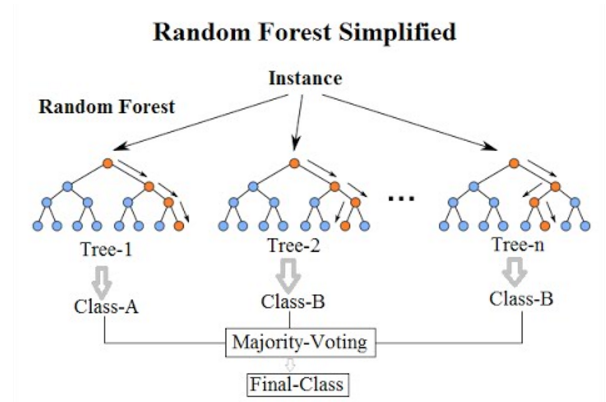

By Venkata Jagannath - https://community.tibco.com/wiki/random-forest-template-tibco-spotfirer-wiki-page
랜덤 포레스트는 의사결정나무의 단점을 보완하여 더욱 고도화된 앙상블 모델인데요.
한마디로, 훈련 과정에서 만들어진 다수의 의사 결정 나무로부터 분류된 결과를 집계해 최종적으로 분류된 데이터, 또는 평균 예측치를 출력하는 모델입니다.

먼저 의사 결정 나무란, 의사 결정 규칙을 나무 구조로 나타내어 전체 자료를 몇 개의 소집단으로 분류하거나 예측을 수행하는 분석 방법입니다.

이러한 수많은 의사 결정 나무들을 모아 숲을 구성하기에 '포레스트'라고 하는 것인데요.
다만, 각각의 의사 결정 나무들을 만들 때 쓰이는 특징들을 무작위로 선정하기 때문에 '랜덤'이 붙는 것입니다.

모델의 이름 그대로, 랜덤 포레스트는 임의(random)의 숲을 구성하기 때문에 오버 피팅, 즉 과적합을 피할 수 있습니다.
다수의 나무들로부터 분류를 집계하는 만큼, 오버 피팅이 나타나는 나무의 영향력을 줄일 수 있거든요.

또한, 앞서 랜덤 포레스트가 앙상블 모델이라고 언급했었죠?
앙상블(ensemble)은 분류, 회귀 분석 등에서 자주 사용되는 학습 방법의 일종으로, 좋은 성능을 얻기 위해 다수의 학습 알고리즘을 사용하는 것을 말합니다.

랜덤 포레스트에서는 이 앙상블 기법 중에서도 배깅을 이용합니다!

배깅(Bagging) 배깅(Bagging)은 'Bootstrap + Aggregating'의 합성어인데요.

여기서 부트스트랩(Bootstrap)이란, 표본 분포를 구하기 위해 데이터를 여러 번 복원 추출(랜덤 샘플링)하는 방법입니다.
이 때, 중복을 허용하기 때문에 단일 데이터가 여러 번 선택될 수도 있습니다.

배깅은 이러한 부트스트랩을 통해서 다양한 데이터셋을 만들고, 이를 학습시킨 모델을 모으는(Arregating) 방법입니다.

즉, 랜덤 포레스트에서 배깅은 모든 의사 결정 나무가 학습 데이터 세트에서 임의로 하위 데이터 세트를 추출하는 과정을 말하는 것이라 이해해 주시면 됩니다.

예를 들어 학습 데이터 세트에 총 1000개의 행이 있다고 하면, 임의로 행을 100개씩 선택해서 의사 결정 나무를 만드는 것입니다.

배깅 속성 (Bagging Feature) 의사 결정 나무를 만들 때는 사용될 속성(feature)들을 제한하여 각 나무들에 다양성을 줘야 합니다.
따라서 모든 속성(feature)들에서 임의로 일부를 선택하고, 그중 정보 획득량이 가장 높은 것을 기준으로 데이터를 분할합니다.
만약 데이터 세트에 n개의 속성이 있는 경우, n 제곱근 개수만큼 무작위로 선택하는 것이 일반적입니다. (A rule of thumb)
예를 들어 총 25개의 속성이 있으면 그중에서 n 제곱근인 5개의 속성만 뽑아서 살펴본 후, 정보 획득량이 가장 높은 걸 기준으로 데이터를 분할하는 것입니다.

랜덤 포레스트 모델 역시 sklearn 패키지를 이용해 간단하게 사용할 수 있습니다.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 모델 선언
model = RandomForestRegressor()

9.Random Forest : 하이퍼 파라미터
하이퍼 파라미터란?

하이퍼 파라미터(hyper parameter)는 모델링할 때 사용자가 직접 세팅해 주는 값을 뜻합니다.

머신러닝 모델을 쓸 때 사용자가 직접 세팅해야 하는 값이 상당히 많은데, 그 모든 값이 다 하이퍼 파라미터입니다.

ex)

batch_size: 배치 크기
(training) epochs: 반복 학습 횟수
optimizer: 옵티마이저
learning rate: 학습률
activation functions: 활성화 함수
* 하이퍼 파라미터는 정해진 최적 값이 존재하지 않으며, 설정에 따라 성능에 큰 차이를 보이기도 합니다.

* 하이퍼 파라미터와 혼용되곤 하는 **파라미터(parameter, 매개변수)**는 학습 과정에서 생성되는 변수를 말합니다. 다시 말해서 사용자가 임의로 설정하는 값이 아닙니다.

사용자가 직접 설정하면 하이퍼 파라미터, 모델 혹은 데이터에 의해 결정되면 파라미터입니다.

그럼, RandomForestRegressor 모델의 하이퍼 파라미터를 튜닝하여 성능을 높여 봅시다!

n_estimators : 결정 트리의 개수(defalut=100)
criterion : 분할된 것(split)의 품질을 측정하는 기능
max_depth : 트리의 최대 깊이
min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수
이외에도 랜덤 포레스트 모델에는 다양한 하이퍼 파라미터가 존재합니다.

이번 하이퍼 파라미터 튜닝에서는 n_estimators와 criterion을 다룹니다.

In [ ]:
model = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=42)

10.모델 학습
이제 모델을 학습 및 예측시켜 볼까요?

선언된 모델은 fit() 메소드를 이용해 학습시킬 수 있어요.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# 모델 학습
model.fit(X_train, y_train)

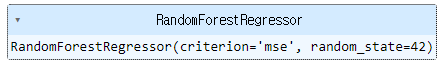

11.모델 예측
학습된 모델에 predict() 메소드를 이용하면 결괏값을 예측할 수 있어요.

In [ ]:
# 학습된 모델을 이용해 결괏값 예측 후 상위 10개의 값 확인
predict = model.predict(X_valid)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(predict[:10])

12.모델 평가
이제 모델을 이용해 예측한 결괏값과 실제값을 비교하여 모델을 평가하고 성능을 확인해 볼까요?

평가산식 : RMSE
이번 버스 운행 시간 예측 프로젝트에서 사용할 평가산식은 RMSE(Root Mean Squared Error)입니다.

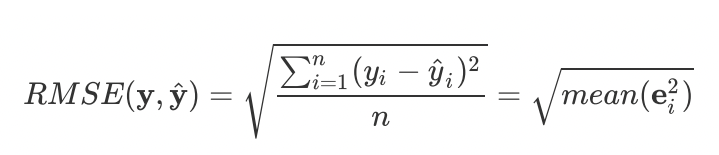

RMSE는 오류 지표를 실제값과 유사한 단위로 다시 변환하여 해석을 쉽게 하며, MAE보다 특이치에 강합니다.

예측하고자 하는 변수, 즉 target이 수치형인 회귀 문제에 사용됩니다.

<회귀 모델을 평가하는 평가 지표>

MAE(Mean Absolute Error): 모델의 예측값과 실제값 차이의 절대값의 평균
MSE(Mean Squared Error): 모델의 예측값과 실제값 차이의 제곱의 평균
RMSE(Root Mean Squared Error): MSE에 루트를 씌운 것
[문제 4]
RMSE 점수를 sklearn 패키지를 이용해 구해 보세요.

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(pred, real):    
    return mean_squared_error(pred, real)**0.5

RMSE = rmse(predict, y_valid)

13.모델 검증 시각화
그래프를 통하여 RMSE를 결괏값과 실제값을 비교해 봅시다.
아래 코드를 확인하고, 직접 실행시켜 보세요!

In [ ]:
# 파이썬 warning 무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트를 사용하기 위한 코드
fe = fm.FontEntry(fname = 'NotoSansKR-Regular.otf', name = 'NotoSansKR')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='NotoSansKR')

## 코드 작성
def make_plot():
    RMSE = rmse(predict, y_valid)

    plt.figure(dpi=150)

    plt.title('RMSE : ' + str(RMSE)[:8])

    plt.plot(y_valid.reset_index(drop=True), alpha=0.6, label='real')
    plt.plot(predict, alpha=0.6, label='pred')

    plt.legend()
    plt.show()

make_plot()

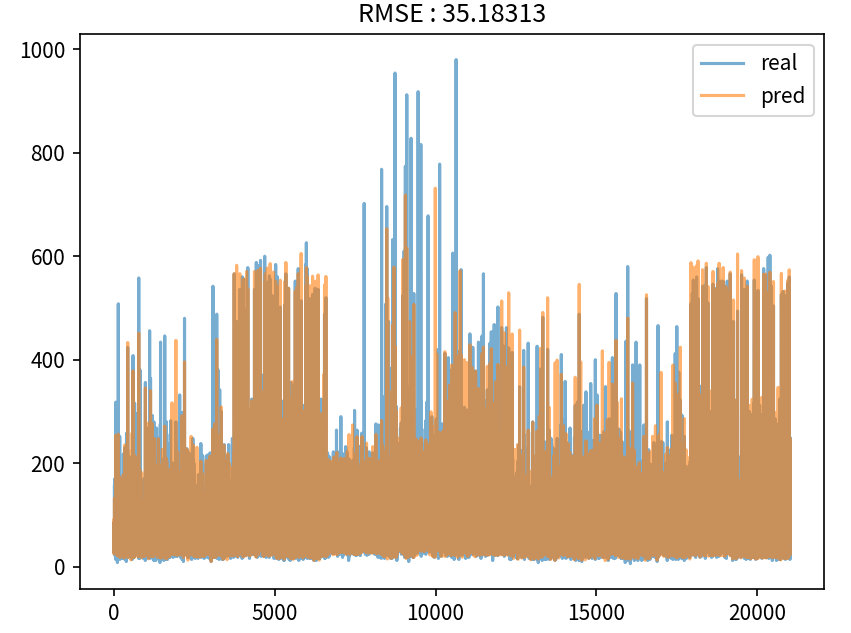

14.모델 선택(2) : XGBoost
XGBoost는 Extreme Gradient Boosting의 약자입니다.

이 XGBoost라는 모델을 알기 위해선, 먼저 Boosting(부스팅)에 관해 이해하실 필요가 있습니다!

Boosting은 한마디로 말해, 순차적으로 모델의 정확도를 높이는 방법입니다.
Boosting에서는 먼저 전체 학습 데이터에서 일부를 선택한 하위 데이터 세트와 이를 학습할 첫 번째 모델을 만듭니다.
그리고 첫 번째 모델이 잘 학습하지 못한 부분을 반영해서 두 번째 데이터 세트와 모델을 만들고,
이런 과정을 반복해서 점진적으로 모델의 정확도를 높입니다.

이러한 Boosting 기법을 이용하여 구현한 알고리즘은 Gradient Boost가 대표적인데요.
이 Gradient Boost 알고리즘을 병렬 학습이 지원되도록 구현한 것이 바로 XGBoost 입니다.

Regression, Classification 문제를 모두 지원하며, 성능과 자원 효율이 좋아서 자주 사용되는 알고리즘이라고 할 수 있습니다.

XGBRegressor : 하이퍼 파라미터

objective: 목적함수
* 'reg:squarederror'는 오차 제곱입니다.
n_estimators: 트리 수
tree_method: gpu 사용
eval_set: 성능 평가를 수행할 데이터 세트
eval_metric: 조기 종료를 위한 평가 지표
early_stopping_rounds: 조기 종료 조건, 평가 지표가 향상될 수 있는 반복 횟수
verbose: 학습 결과 출력 조건
이외에도 XGBRegressor 모델에는 다양한 하이퍼 파라미터가 존재합니다.

※ Early Stopping (조기 중단) 기능

GBM의 경우 n_estimators에 지정된 횟수만큼 학습을 끝까지 수행하지만, XGB의 경우 오류가 더 이상 개선되지 않으면 수행을 중지합니다.
만약 n_estimators 를 200으로 설정하고, 조기 중단 파라미터 값을 50으로 설정하면, 1부터 200회까지 부스팅을 하다가 50회를 반복하는 동안 학습 오류가 감소하지 않으면 더 이상 부스팅을 진행하지 않고 종료합니다.
(ex. 100회에서 학습 오류 값이 0.8인데 101~150회 반복하는 동안 예측 오류가 0.8보다 작은 값이 하나도 없으면 부스팅을 종료)
조기 중단 기능은 불필요한 학습 시간을 단축시켜 준다는 장점이 있습니다. 하지만 이 조기 중단 값을 급격하게 줄이게 되면 모델 성능이 향상될 여지가 있음에도 불구하고 학습이 조기 중단되는 경우가 발생할 수 있습니다.

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 3000, random_state=42)

15.모델 학습 / 예측
이제 모델을 학습 및 예측시켜 볼까요?
선언된 모델은 fit() 메소드를 이용해 학습시킬 수 있어요.

XGBoost를 학습시킬 때는, 학습시킬 셋과 검증시킬 셋이 필요합니다.

In [ ]:
model.fit(X_train,y_train, eval_set=[(X_valid,y_valid)],
          eval_metric = 'rmse',
          early_stopping_rounds=10,
          verbose=5
          )

y_pred = model.predict(X_valid)

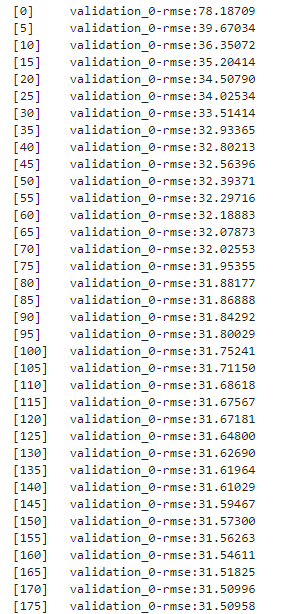
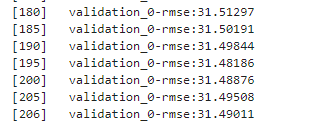

16.평가
마찬가지로 모델을 이용해 예측한 결괏값과 실제값을 비교하여 모델을 평가하고 성능을 확인해 볼까요?

In [ ]:
RMSE = rmse(y_pred, y_valid)
RMSE



17.모델 검증 시각화
그래프를 통하여 RMSE의 결괏값과 실제값을 비교해 봅시다.

In [ ]:
def make_plot():
    RMSE = rmse(y_pred, y_valid)

    plt.figure(dpi=150)

    plt.title('RMSE : ' + str(RMSE)[:8])

    plt.plot(y_valid.reset_index(drop=True), alpha=0.6, label='real')
    plt.plot(predict, alpha=0.6, label='pred')

    plt.legend()
    plt.show()

make_plot()

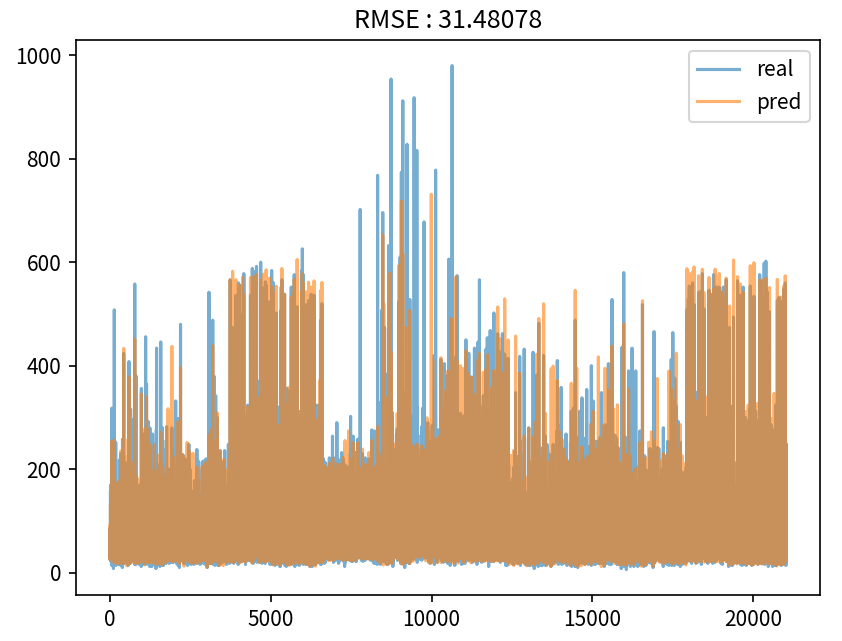

Validation셋에 대한 RandomForest의 RMSE 값보다 XGBoost의 RMSE 값이 더 우수한 걸 확인할 수 있습니다.

18.최종 모델 선택 : XGBoost
성능이 괜찮았던 XGBoost 모델을 사용하여 제출할 수 있도록 다시 한번 모델링을 진행해 봅시다!

In [ ]:
import xgboost as xgb

# 1. 모델 정의
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 3000)

# 2. 모델 학습
model.fit(X_train,y_train, eval_set=[(X_valid,y_valid)],
          eval_metric = 'rmse',
          early_stopping_rounds=10,
          verbose= True
          )

# 3. 예측
# predict() 메소드 이용
predict = model.predict(test[features])


# 예측값 시각화
plt.plot(predict)
plt.show()

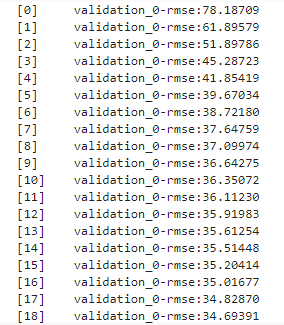
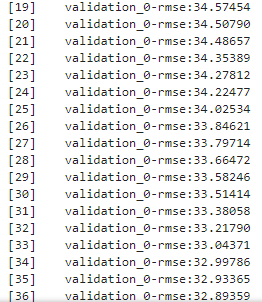
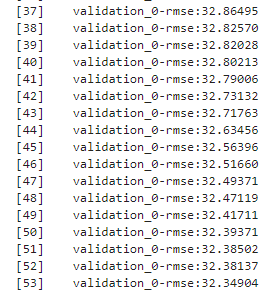
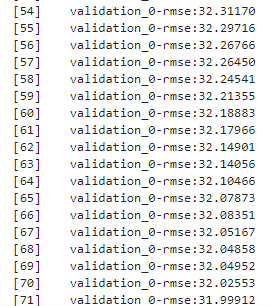
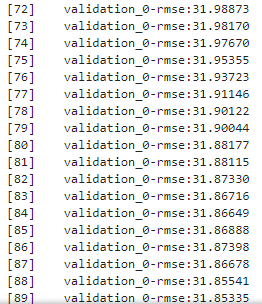
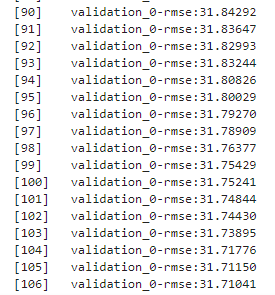
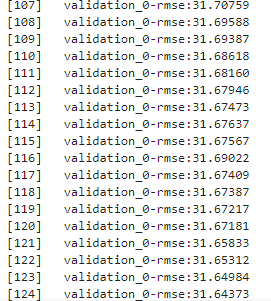
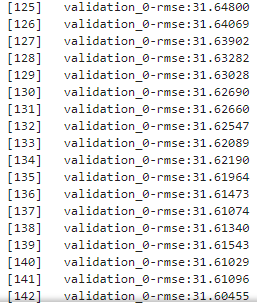
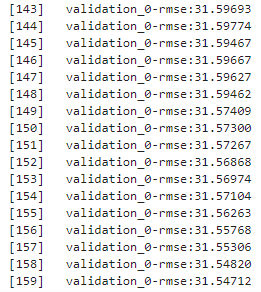
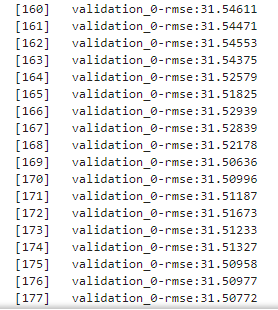
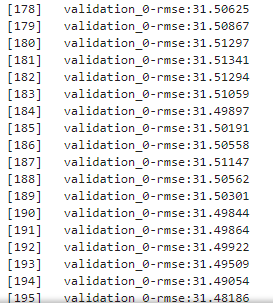
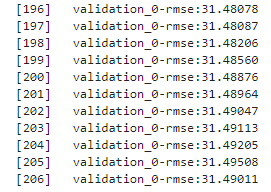
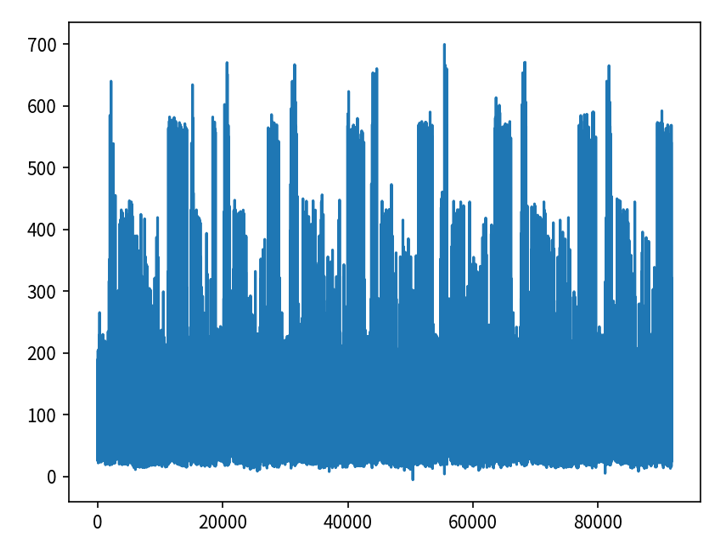

19.제출 파일 생성 및 제출
앞서 sample_submission.csv 제출용 파일을 이용하여

우리가 모델링으로 예측한 값을 채워 보죠!

In [ ]:
# 예측된 값을 정답 파일과 병합
submission['next_arrive_time'] = predict

submission.head()

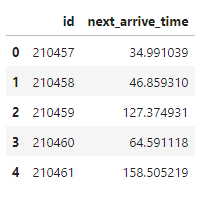

#20.csv 파일 생성

submission이 잘 채워졌습니다.

그럼 지난 시간과 마찬가지로 제출용 파일 submission.csv을 생성해 보죠!

In [ ]:
submission.to_csv('submission.csv', index=False)